# Machine Learning for Binary classification

## Loading the data

In [ ]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df

# load training data from a CSV file into pandas DataFrame
training_data = pd.read_csv('csv/training_data.csv')
print(f"Traning data shape: {training_data.shape}")

testing_data = pd.read_csv('csv/test_data.csv')
print(f"Testing data shape: {testing_data.shape}")

Traning data shape: (30000, 14)
Testing data shape: (15000, 14)


### Data profiling

In [ ]:
# training profiling
print(training_data.info())

# statistic description
print(training_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              30000 non-null  int64 
 1    workclass       30000 non-null  object
 2    education       30000 non-null  object
 3    education-num   30000 non-null  int64 
 4    marital-status  30000 non-null  object
 5    occupation      30000 non-null  object
 6    relationship    30000 non-null  object
 7    race            30000 non-null  object
 8    sex             30000 non-null  object
 9    capital-gain    30000 non-null  int64 
 10   capital-loss    30000 non-null  int64 
 11   hours-per-week  30000 non-null  int64 
 12   native-country  30000 non-null  object
 13   <=50K/>50K.     30000 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB
None
                age   education-num   capital-gain   capital-loss  \
count  30000.000000    30000.000000   30000.000

In [ ]:
# testing profiling
print(testing_data.info())

# statistic description
print(testing_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              15000 non-null  int64 
 1    workclass       15000 non-null  object
 2    education       15000 non-null  object
 3    education-num   15000 non-null  int64 
 4    marital-status  15000 non-null  object
 5    occupation      15000 non-null  object
 6    relationship    15000 non-null  object
 7    race            15000 non-null  object
 8    sex             15000 non-null  object
 9    capital-gain    15000 non-null  int64 
 10   capital-loss    15000 non-null  int64 
 11   hours-per-week  15000 non-null  int64 
 12   native-country  15000 non-null  object
 13   <=50K/>50K.     15000 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB
None
                age   education-num   capital-gain   capital-loss  \
count  15000.000000    15000.000000   15000.000

### Identify missing values

In [ ]:
print(f'There are {training_data.isnull().sum().sum()} missing values.')

There are 0 missing values.


## Check if the datasets are categorical

In [ ]:
def check_categorical(data, unique_threshold=0.05, known_categoricals=None):

    # implement the function check for categorical columns in a DataFrame
    categorical = {}
    n_rows = len(data)

    for column in data.columns:
        # if the column is known to be categorical
        if known_categoricals and column in known_categoricals:
            categorical[column] = True
            continue

        # check the data type
        if data[column].dtype == 'object' or data[column].dtype.name == 'category':
            categorical[column] = True
        else:
            # calculate the ratio of unique entries
            unique_ratio = data[column].nunique() / n_rows

            # if the unique ratio is below the threshold, consider it categorical
            # unique_threshold: the threshold for the unique value ratio
            if unique_ratio < unique_threshold:
                categorical[column] = True
            else:
                categorical[column] = False

    # a dict of column names with the boolean indicating (if they are categorical)
    return categorical

result = check_categorical(training_data)
print(result)

{'age': True, ' workclass': True, ' education': True, ' education-num': True, ' marital-status': True, ' occupation': True, ' relationship': True, ' race': True, ' sex': True, ' capital-gain': True, ' capital-loss': True, ' hours-per-week': True, ' native-country': True, ' <=50K/>50K.': True}


### Since the datasets are categorical, so we will use the count plot to visualise the dataset for observation purpose

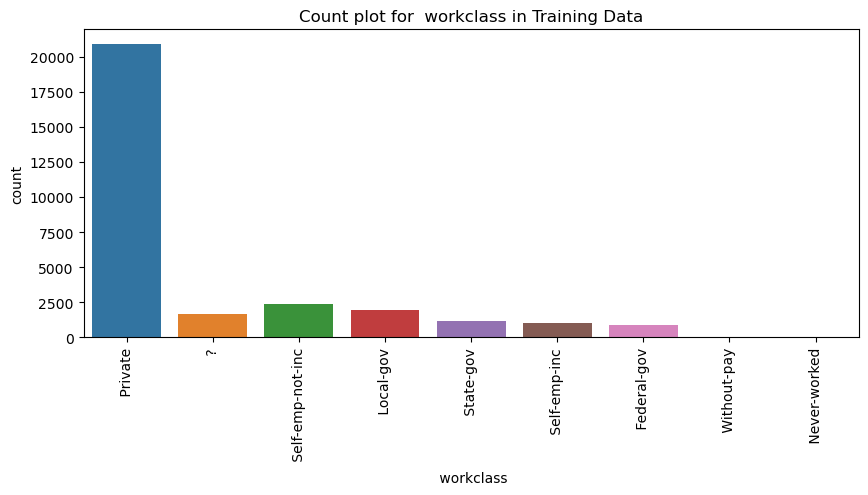

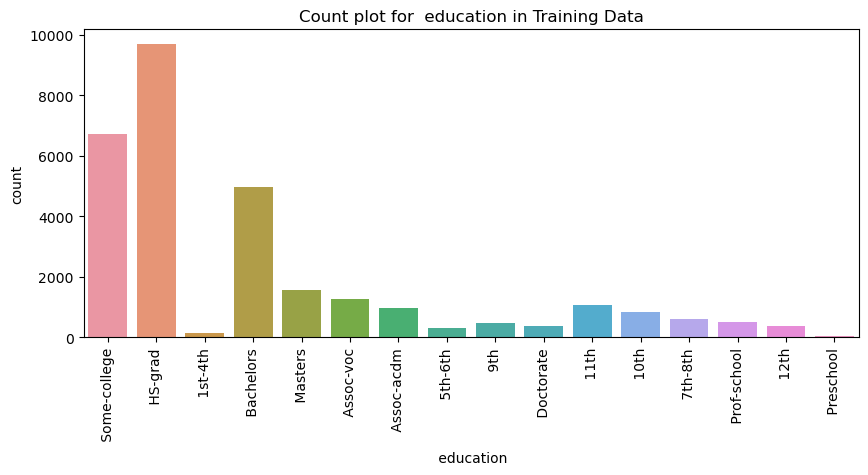

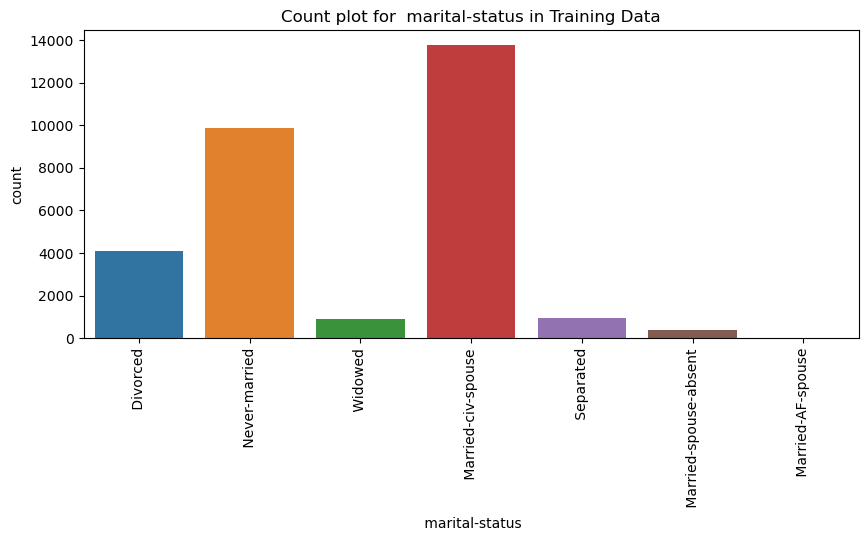

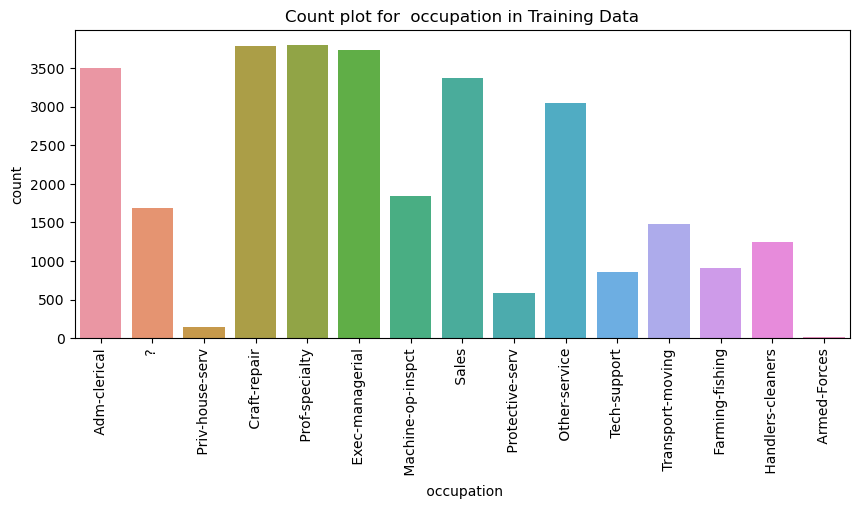

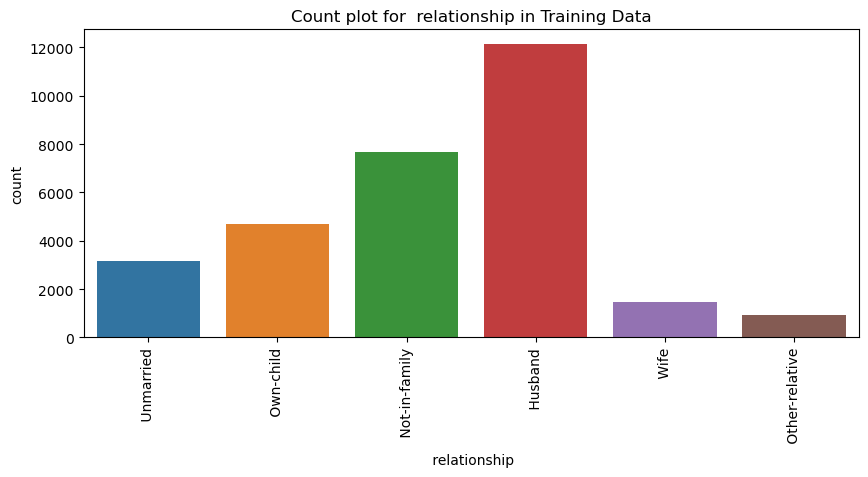

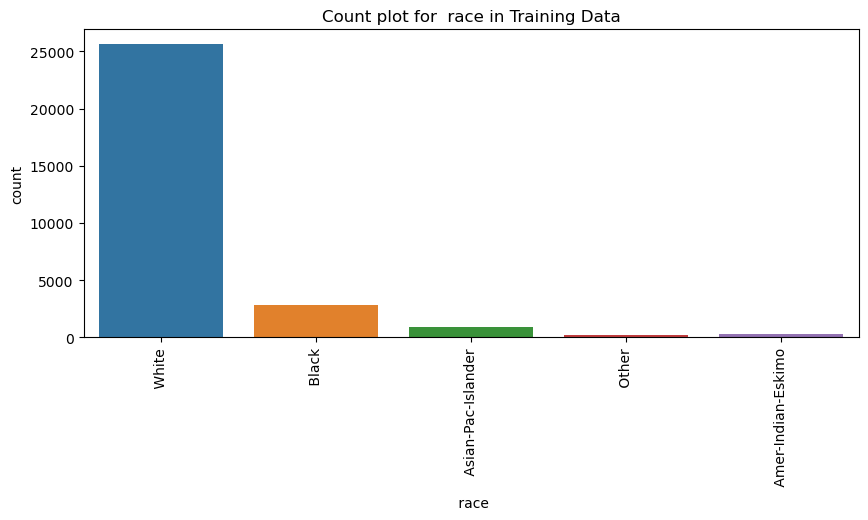

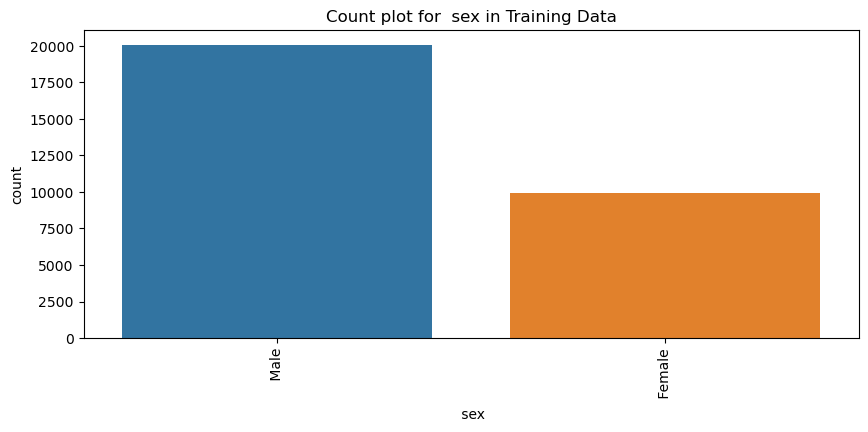

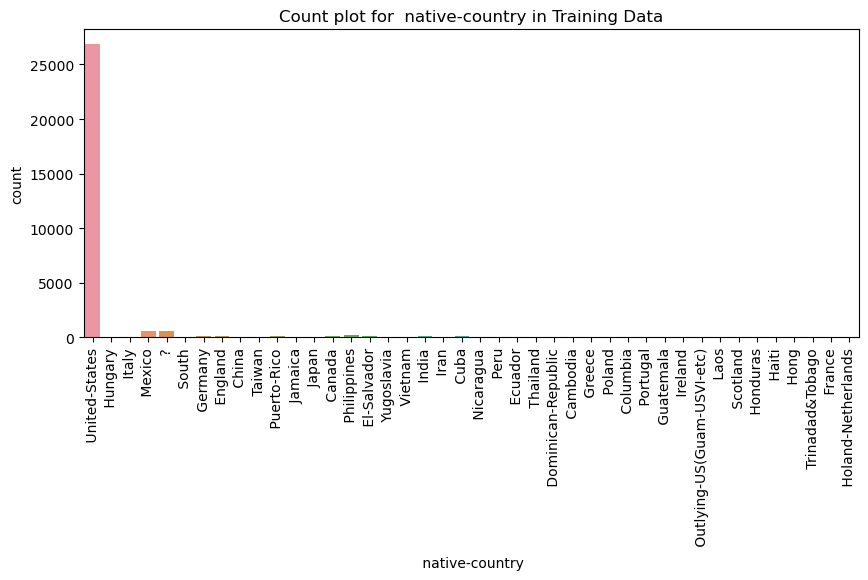

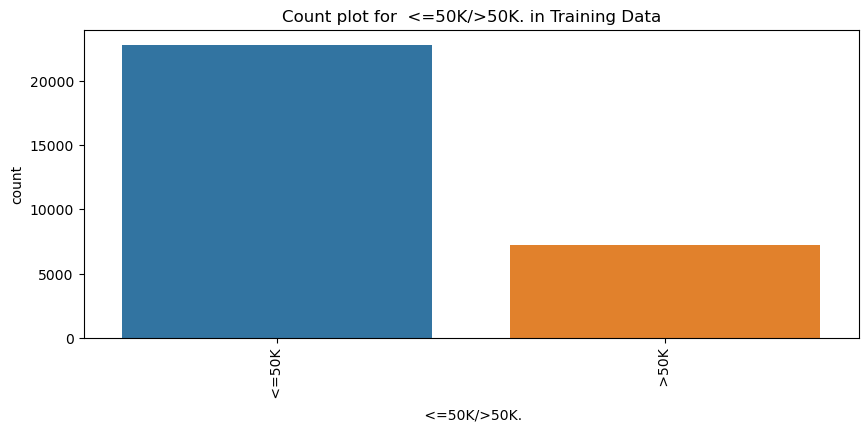

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# # Histograms for numerical features
# training_data.hist(bins=15, figsize=(15, 10))
# plt.suptitle("Histograms of Numerical Features in Training Data")
# plt.show()

# for each categorical columnm, create a count plot
for column in training_data.select_dtypes(include='object').columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=column, data=training_data)
    plt.title(f'Count plot for {column} in Training Data')
    plt.xticks(rotation=90)
    plt.show()

### Result of countplots

![workclass.png](attachment:workclass.png)

The distribution of workers across different employers or employment situations is represented in this graph. The highest bar under "Private" suggests that most people in the training data are employed by private companies. The other categories, like self-employed and government jobs (local, state, federal), have fewer individuals, as indicated by their shorter bars.

![education.png](attachment:education.png)

This plot represents the highest education levels attained by individuals in the dataset. Categories like HS-grad, Some-college, and Bachelors show that a significant number of individuals have high school diplomas, some college education, or a bachelor's degree. The counts decrease for higher education levels like Masters and Doctorate.

![matial-status.png](attachment:matial-status.png)

The marital status plot categorises individuals according to their marital situation. The Never-married and Married-civ-spouse categories have the highest counts, suggesting that these are the two most common marital statuses in the dataset.

![occupation.png](attachment:occupation.png)

This plot categorises individuals by their job titles or the nature of their work. It reveals which occupations are more common among the dataset's individuals. For example, Admin-clerical and Craft-repair might have higher counts, indicating more individuals are employed in these areas.

![relationship.png](attachment:relationship.png)

This plot shows the family relationship status of individuals in the dataset. The Husband category has the highest count, followed by Not-in-family and Own-child. This data can be significant for models that might consider family dynamics or dependents.

![race.png](attachment:race.png)

The race plot shows the racial composition of the dataset. A much higher count for White compared to other races like Black, Asian-Pac-Islander, Amer-Indian-Eskimo, and Other indicates racial diversity, with a predominance of white individuals in the dataset.

![sex.png](attachment:sex.png)

This plot compares the number of males to females in the dataset. The bar for Male is higher than for Female, indicating more male individuals are represented in the dataset.

![native-country.png](attachment:native-country.png)

This plot displays the counts of individuals by their native country. The United-States bar is much taller than any other, indicating most individuals in the dataset are from the United States, with the rest coming from a wide variety of other countries.

![target.png](attachment:target.png)

This plot categorizes individuals into two income groups: those who make at or below 50,000 annually, and those who make more than that. The taller bar for "<=50K" indicates that more individuals in the dataset fall into the lower income category.

<br>

<hr>


## Handling the missing values
The dataset information indicates that all columns are non-null, but as we can see a '?' in count plot, assuming that the '?' is being used as a placeholder for missing or unknown values within the dataset.

In [ ]:
# strip leading and trailing whitespace in object columns
training_data = training_data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# replace '?' with nan
training_data = training_data.replace('?', np.nan)
# recheck again
print(training_data.isnull().sum())

age                   0
 workclass         1677
 education            0
 education-num        0
 marital-status       0
 occupation        1682
 relationship         0
 race                 0
 sex                  0
 capital-gain         0
 capital-loss         0
 hours-per-week       0
 native-country     539
 <=50K/>50K.          0
dtype: int64


## Simple imputation
Simple imputation is a straighforward, easy to implement, computationally efficient, and work well in many scenarios

In [ ]:
from sklearn.impute import SimpleImputer

# strip whitespace from column names
training_data.columns = training_data.columns.str.strip()

# identify the columns we want to impute
categorical_columns = ['workclass', 'occupation', 'native-country']

# create the imputer
imputer = SimpleImputer(strategy='most_frequent')

# applying on the identified columns
training_data[categorical_columns] = imputer.fit_transform(training_data[categorical_columns])

print(training_data.isnull().sum())

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
<=50K/>50K.       0
dtype: int64


## Categorical data encoding: label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

# convert the categorical columns into numerical
label = LabelEncoder()
for colume in training_data.select_dtypes(include=['object']).columns:
    training_data[colume] = label.fit_transform(training_data[colume])

# try to print the result of first 5 rows
print(training_data.head())

   age  workclass  education  education-num  marital-status  occupation  \
0   30          3         15             10               0           0   
1   30          3         11              9               4           9   
2   18          3         11              9               4           0   
3   74          3          3              2               6           8   
4   61          5         11              9               2           2   

   relationship  race  sex  capital-gain  capital-loss  hours-per-week  \
0             4     4    1             0             0              40   
1             3     4    1             0             0              25   
2             3     4    1             0             0              35   
3             1     2    0             0             0              15   
4             0     4    1             0             0              52   

   native-country  <=50K/>50K.  
0              38            0  
1              38            0  
2    

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# seperate features as X
X = training_data.drop('<=50K/>50K.', axis=1)
# seperate target variable as Y
y = training_data['<=50K/>50K.']

# split the dataset into traning and testing dataset (20% of dataset for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## RandomForestClassifier with a parameter of 100



In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

# initialise the classifier, setting the n_estimate to 100
randomT = RandomForestClassifier(n_estimators=100, random_state=0)
# fit the model on the scaled training data
randomT.fit(X_train, y_train)

# make a prediction on the scaled test data
y_prediction = randomT.predict(X_test)
# calculate and print the accuracy score
print('Model accuracy score with a number of tree estimation of 100 : {0:0.4f}'. format(accuracy_score(y_test, y_prediction)))

Model accuracy score with a number of tree estimation of 100 : 0.8448


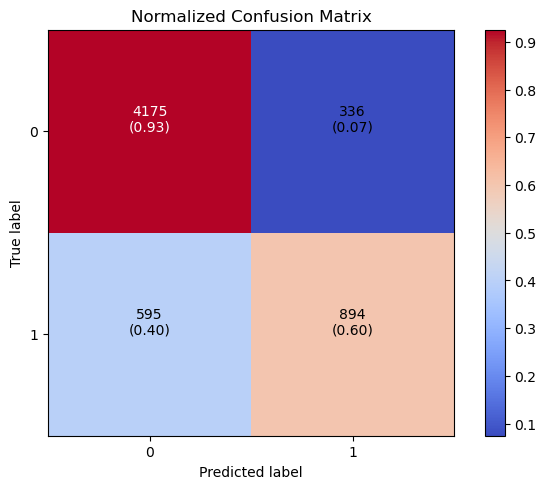

Precision: 0.8384
Recall: 0.8448
F1-Score: 0.8396


In [ ]:
import itertools

# compute the confusion matrix
cm = confusion_matrix(y_test, y_prediction)
# calculate precision, recall, and f-1 score
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_prediction, average='weighted')

# normalising the confusion matrixs by dividing by the sum of elements in the row
cm_normalised = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# using heatmap to visualise the normalise matrix
plt.imshow(cm_normalised, interpolation='nearest', cmap=plt.cm.coolwarm)
plt.title('Normalized Confusion Matrix')
plt.colorbar()

# adding labels to x-axis and y-axis
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test), rotation=0)
plt.yticks(tick_marks, np.unique(y_test))

# adding text annotations to each cell of the matrix
# thresh: change the colour of the text
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]}\n({cm_normalised[i, j]:.2f})",
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# print precision, recall, and F-score
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {fscore:.4f}")

![cm-default.png](attachment:cm-default.png)

Based on this confusion matrix and the metrics provided, the RandomForest model is performing quite well on the dataset. It is achieving high precision and recall, indicating that it has a good balance between identifying positive cases and correctly predicting the negative cases. <br><br>

We can see that an F-1 score of 0.8396 is quite high and shows a good balance between precision and recall, this is more important than accuracy, esepcially when the clss distribution is imbalanced.

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90      4511
           1       0.73      0.60      0.66      1489

    accuracy                           0.84      6000
   macro avg       0.80      0.76      0.78      6000
weighted avg       0.84      0.84      0.84      6000



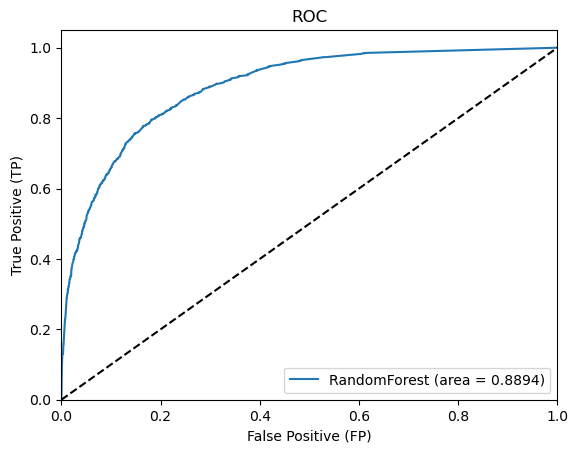

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# classification Report
print("Classification Report:\n", classification_report(y_test, y_prediction))

# ROC curve and AUC
y_pred_proba = randomT.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.4f)' % roc_auc_score(y_test, y_pred_proba))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive (FP)')
plt.ylabel('True Positive (TP)')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

Based on the classification Report, it shows that precision, recall, and F-1 sscore on class 0 are high accuracy and performing better when comparing to the minor class (class 1). This highlights the imbalance between the classes.

## Handling imbalance data

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification

# applying SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# retrain the model after over-sampling
randomT.fit(X_train_smote, y_train_smote)

y_preds = randomT.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4511
           1       0.66      0.69      0.67      1489

    accuracy                           0.83      6000
   macro avg       0.78      0.79      0.78      6000
weighted avg       0.84      0.83      0.84      6000



#### Before and after handling imbalance interpretation

- Improvement in recall for class 1 increased: which means the model is correctly identifying a higher propotion of true class 1 instance.
- Precision for class 1 decreased: which mean while the model is identifying more true positives, it makes more false positive errors for this class instance
- Trade-off between Precision and Recall: recall improvement for the minor class often leens to a slightly decrease in precision.

<br><hr>

In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import RandomizedSearchCV

# apply pipeline to prevent the data leakage
pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', randomT)
])

# define the parameter grid to search over
param_dist = {
    'classifier__n_estimators': np.arange(100, 1100, 100),
    'classifier__max_features': ['auto', 'sqrt'],
    'classifier__max_depth': np.arange(10, 110, 10),
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False]
}

# initialise Random Search
random_search = RandomizedSearchCV(
                                   # the random search model with defualt
                                   estimator=pipeline,
                                   # the distribution of param to try
                                   param_distributions=param_dist,
                                   # number of param settings
                                   n_iter=100,
                                   # cross-validation split strategy
                                   cv=5,
                                   # verbosity level
                                   verbose=2,
                                   # number of seed used
                                   random_state=42,
                                   # use all processors
                                   n_jobs=-1)

# fit the model using the cross-validation variables
random_search.fit(X_train, y_train)

# best parameters
print("Best Parameters:", random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'

[CV] END classifier__bootstrap=True, classifier__max_depth=80, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   2.1s
[CV] END classifier__bootstrap=True, classifier__max_depth=80, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   2.2s
[CV] END classifier__bootstrap=True, classifier__max_depth=80, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   2.2s
[CV] END classifier__bootstrap=True, classifier__max_depth=80, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   2.2s
[CV] END classifier__bootstrap=True, classifier__max_depth=80, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=10, clas

/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=20, classifier__max_features=auto, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   3.9s
[CV] END classifier__bootstrap=True, classifier__max_depth=20, classifier__max_features=auto, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   4.0s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=20, classifier__max_features=auto, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   3.9s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=20, classifier__max_features=auto, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   3.9s
[CV] END classifier__bootstrap=True, classifier__max_depth=20, classifier__max_features=auto, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   3.8s
[CV] END classifier__bootstrap=False, classifier__max_depth=100, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=600; total time=  16.3s
[CV] END classifier__bootstrap=False, classifier__max_depth=100, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=600; total time=  16.8s
[CV] END classifier__bootstrap=False, classifier__max_depth=100, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=2, cla

/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=False, classifier__max_depth=100, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=1000; total time=  29.2s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END classifier__bootstrap=False, classifier__max_depth=100, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=1000; total time=  29.7s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=False, classifier__max_depth=100, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=1000; total time=  28.6s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=False, classifier__max_depth=100, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=1000; total time=  29.1s
[CV] END classifier__bootstrap=False, classifier__max_depth=100, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=600; total time=  19.0s
[CV] END classifier__bootstrap=False, classifier__max_depth=100, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=1000; total time=  29.4s
[CV] END classifier__bootstrap=True, classifier__max_depth=90, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=600; total time=  12.4s
[CV] END classifier__bootstrap=True, classifier__max_depth=90, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=10,

/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=100, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=300; total time=   6.1s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=10, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=700; total time=  10.3s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=False, classifier__max_depth=50, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=800; total time=  22.6s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=10, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=700; total time=   9.9s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=False, classifier__max_depth=50, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=800; total time=  22.6s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=False, classifier__max_depth=50, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=800; total time=  22.5s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=False, classifier__max_depth=50, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=800; total time=  22.5s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=False, classifier__max_depth=50, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=800; total time=  22.6s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=False, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=700; total time=  19.6s
[CV] END classifier__bootstrap=False, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=700; total time=  19.5s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=False, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=700; total time=  19.0s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=False, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=700; total time=  19.1s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=False, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=700; total time=  19.6s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=10, classifier__max_features=auto, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=300; total time=   4.6s
[CV] END classifier__bootstrap=True, classifier__max_depth=10, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=700; total time=  10.3s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=10, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=700; total time=  10.2s
[CV] END classifier__bootstrap=True, classifier__max_depth=10, classifier__max_features=auto, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=300; total time=   4.4s
[CV] END classifier__bootstrap=True, classifier__max_depth=10, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=700; total time=  10.1s
[CV] END classifier__bootstrap=True, classifier__max_depth=10, classifier__max_features=auto, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=300; total time=   4.3s
[CV] END classifier__bootstrap=True, classifier__max_depth=10, classifier__max_features=auto, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classif

/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=10, classifier__max_features=auto, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=300; total time=   4.5s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=600; total time=  11.5s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=600; total time=  11.4s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=600; total time=  11.3s
[CV] END classifier__bootstrap=True, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=600; total time=  11.2s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=600; total time=  10.9s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=60, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=1000; total time=  20.7s
[CV] END classifier__bootstrap=True, classifier__max_depth=60, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=1000; total time=  21.0s
[CV] END classifier__bootstrap=True, classifier__max_depth=60, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=1000; total time=  20.7s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'

[CV] END classifier__bootstrap=True, classifier__max_depth=60, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=1000; total time=  20.7s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=60, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=1000; total time=  21.0s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=False, classifier__max_depth=60, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=800; total time=  25.2s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=False, classifier__max_depth=60, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=800; total time=  25.1s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=90, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=1000; total time=  18.5s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=90, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=1000; total time=  18.6s
[CV] END classifier__bootstrap=False, classifier__max_depth=60, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=800; total time=  24.8s
[CV] END classifier__bootstrap=True, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   2.0s
[CV] END classifier__bootstrap=False, classifier__max_depth=60, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=800; total time=  25.4s
[CV] END classifier__bootstrap=False, classifier__max_depth=60, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=2, class

/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=50, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=1000; total time=  18.2s
[CV] END classifier__bootstrap=False, classifier__max_depth=10, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=500; total time=   9.6s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=False, classifier__max_depth=10, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=500; total time=   9.5s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=False, classifier__max_depth=10, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=500; total time=   9.4s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=False, classifier__max_depth=10, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=500; total time=   9.7s
[CV] END classifier__bootstrap=True, classifier__max_depth=70, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   3.9s
[CV] END classifier__bootstrap=True, classifier__max_depth=50, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=1000; total time=  18.3s
[CV] END classifier__bootstrap=True, classifier__max_depth=60, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=800; total time=  15.2s
[CV] END classifier__bootstrap=True, classifier__max_depth=60, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classif

/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=70, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   3.8s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=70, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   3.9s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=70, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   3.7s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=60, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=800; total time=  14.6s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=60, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=800; total time=  15.0s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=60, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=800; total time=  14.8s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=False, classifier__max_depth=40, classifier__max_features=auto, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=800; total time=  23.0s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=False, classifier__max_depth=40, classifier__max_features=auto, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=800; total time=  23.3s
[CV] END classifier__bootstrap=False, classifier__max_depth=40, classifier__max_features=auto, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=800; total time=  23.1s
[CV] END classifier__bootstrap=False, classifier__max_depth=40, classifier__max_features=auto, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=800; total time=  22.8s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=False, classifier__max_depth=40, classifier__max_features=auto, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=800; total time=  23.5s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=30, classifier__max_features=auto, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=600; total time=  11.8s
[CV] END classifier__bootstrap=True, classifier__max_depth=30, classifier__max_features=auto, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=600; total time=  11.8s
[CV] END classifier__bootstrap=True, classifier__max_depth=40, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   2.1s
[CV] END classifier__bootstrap=True, classifier__max_depth=40, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   2.1s
[CV] END classifier__bootstrap=True, classifier__max_depth=40, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classif

/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=False, classifier__max_depth=60, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=400; total time=  11.4s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=50, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   4.3s
[CV] END classifier__bootstrap=False, classifier__max_depth=60, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=400; total time=  11.2s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=50, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   4.4s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=50, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   4.5s
[CV] END classifier__bootstrap=True, classifier__max_depth=50, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   4.4s
[CV] END classifier__bootstrap=True, classifier__max_depth=10, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=1000; total time=  13.6s
[CV] END classifier__bootstrap=True, classifier__max_depth=10, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=1000; total time=  13.7s
[CV] END classifier__bootstrap=False, classifier__max_depth=70, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=5, clas

/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=False, classifier__max_depth=70, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=1000; total time=  28.5s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=False, classifier__max_depth=70, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=1000; total time=  28.5s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=False, classifier__max_depth=40, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=800; total time=  24.6s
[CV] END classifier__bootstrap=False, classifier__max_depth=40, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=800; total time=  24.2s
[CV] END classifier__bootstrap=False, classifier__max_depth=40, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=800; total time=  24.7s
[CV] END classifier__bootstrap=False, classifier__max_depth=40, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=800; total time=  24.7s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=False, classifier__max_depth=40, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=800; total time=  24.0s
[CV] END classifier__bootstrap=False, classifier__max_depth=60, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=300; total time=   8.5s
[CV] END classifier__bootstrap=False, classifier__max_depth=60, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=300; total time=   8.8s
[CV] END classifier__bootstrap=False, classifier__max_depth=60, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=300; total time=   8.4s
[CV] END classifier__bootstrap=True, classifier__max_depth=10, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=10, clas

/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=70, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=700; total time=  13.8s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=50, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=800; total time=  17.5s
[CV] END classifier__bootstrap=True, classifier__max_depth=50, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=800; total time=  17.6s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=60, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=1000; total time=  21.4s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=50, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=800; total time=  17.6s
[CV] END classifier__bootstrap=True, classifier__max_depth=50, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=800; total time=  17.8s
[CV] END classifier__bootstrap=True, classifier__max_depth=60, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=1000; total time=  21.6s
[CV] END classifier__bootstrap=True, classifier__max_depth=60, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=1000; total time=  21.7s
[CV] END classifier__bootstrap=True, classifier__max_depth=60, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classif

/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=False, classifier__max_depth=70, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=400; total time=  11.0s
[CV] END classifier__bootstrap=True, classifier__max_depth=60, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=800; total time=  17.0s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=60, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=800; total time=  16.2s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=False, classifier__max_depth=70, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=400; total time=  10.9s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=False, classifier__max_depth=70, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=400; total time=  11.2s
[CV] END classifier__bootstrap=False, classifier__max_depth=50, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=700; total time=  19.2s
[CV] END classifier__bootstrap=True, classifier__max_depth=10, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   1.6s
[CV] END classifier__bootstrap=False, classifier__max_depth=50, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=700; total time=  19.7s
[CV] END classifier__bootstrap=False, classifier__max_depth=50, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=10, cl

/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=False, classifier__max_depth=70, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=600; total time=  16.0s
[CV] END classifier__bootstrap=False, classifier__max_depth=70, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=600; total time=  16.7s
[CV] END classifier__bootstrap=True, classifier__max_depth=80, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=400; total time=   8.0s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=100, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=700; total time=  12.8s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=100, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=700; total time=  13.6s
[CV] END classifier__bootstrap=True, classifier__max_depth=100, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=700; total time=  13.4s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=100, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=700; total time=  13.4s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=100, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=700; total time=  13.5s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=90, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   2.1s
[CV] END classifier__bootstrap=True, classifier__max_depth=90, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   2.1s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=90, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   2.1s
[CV] END classifier__bootstrap=True, classifier__max_depth=90, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   2.1s
[CV] END classifier__bootstrap=True, classifier__max_depth=80, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=400; total time=   8.0s
[CV] END classifier__bootstrap=True, classifier__max_depth=90, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   2.1s
[CV] END classifier__bootstrap=True, classifier__max_depth=80, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classif

/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=False, classifier__max_depth=70, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=300; total time=   8.2s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=False, classifier__max_depth=70, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=300; total time=   8.4s
[CV] END classifier__bootstrap=True, classifier__max_depth=30, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=800; total time=  16.4s
[CV] END classifier__bootstrap=True, classifier__max_depth=30, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=800; total time=  16.2s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=30, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=800; total time=  16.0s
[CV] END classifier__bootstrap=True, classifier__max_depth=30, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=800; total time=  16.4s
[CV] END classifier__bootstrap=True, classifier__max_depth=30, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=800; total time=  15.9s
[CV] END classifier__bootstrap=False, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=500; total time=  13.9s
[CV] END classifier__bootstrap=False, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=2, clas

/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=50, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=300; total time=   6.2s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=50, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=300; total time=   6.3s
[CV] END classifier__bootstrap=True, classifier__max_depth=50, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=300; total time=   6.2s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=50, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=300; total time=   6.5s
[CV] END classifier__bootstrap=True, classifier__max_depth=50, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=300; total time=   5.9s
[CV] END classifier__bootstrap=False, classifier__max_depth=10, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=800; total time=  15.3s
[CV] END classifier__bootstrap=False, classifier__max_depth=10, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=800; total time=  15.4s
[CV] END classifier__bootstrap=False, classifier__max_depth=10, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classi

/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=20, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=500; total time=  10.0s
[CV] END classifier__bootstrap=True, classifier__max_depth=20, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=500; total time=  10.0s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=False, classifier__max_depth=10, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=800; total time=  16.0s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=20, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=500; total time=   9.9s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=20, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=500; total time=   9.8s
[CV] END classifier__bootstrap=True, classifier__max_depth=20, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=500; total time=  10.1s
[CV] END classifier__bootstrap=False, classifier__max_depth=30, classifier__max_features=auto, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   5.8s
[CV] END classifier__bootstrap=True, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=600; total time=  12.4s
[CV] END classifier__bootstrap=False, classifier__max_depth=30, classifier__max_features=auto, classifier__min_samples_leaf=2, classifier__min_samples_split=10, class

/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=False, classifier__max_depth=30, classifier__max_features=auto, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   5.8s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=600; total time=  11.9s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=False, classifier__max_depth=80, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   5.9s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=False, classifier__max_depth=80, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   6.1s
[CV] END classifier__bootstrap=True, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=600; total time=  11.8s
[CV] END classifier__bootstrap=True, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=600; total time=  12.1s
[CV] END classifier__bootstrap=True, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=600; total time=  12.0s
[CV] END classifier__bootstrap=False, classifier__max_depth=80, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=10, class

/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=False, classifier__max_depth=80, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   6.0s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   4.4s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   4.4s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   4.2s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   4.4s
[CV] END classifier__bootstrap=True, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   4.2s
[CV] END classifier__bootstrap=True, classifier__max_depth=10, classifier__max_features=auto, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=400; total time=   6.0s
[CV] END classifier__bootstrap=True, classifier__max_depth=10, classifier__max_features=auto, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=400; total time=   6.0s
[CV] END classifier__bootstrap=True, classifier__max_depth=10, classifier__max_features=auto, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifie

/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'

[CV] END classifier__bootstrap=True, classifier__max_depth=100, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=400; total time=   7.4s
[CV] END classifier__bootstrap=True, classifier__max_depth=100, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=400; total time=   7.7s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=100, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=400; total time=   7.8s
[CV] END classifier__bootstrap=True, classifier__max_depth=100, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=400; total time=   7.7s
[CV] END classifier__bootstrap=True, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=1000; total time=  18.9s
[CV] END classifier__bootstrap=True, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=1000; total time=  19.2s
[CV] END classifier__bootstrap=True, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=5, cla

/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=10, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=400; total time=   5.8s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=10, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=400; total time=   5.8s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=10, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=400; total time=   5.8s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=10, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=400; total time=   5.9s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=10, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=400; total time=   6.1s
[CV] END classifier__bootstrap=True, classifier__max_depth=40, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=500; total time=  11.0s
[CV] END classifier__bootstrap=True, classifier__max_depth=90, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=1000; total time=  21.6s
[CV] END classifier__bootstrap=True, classifier__max_depth=40, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=500; total time=  10.6s
[CV] END classifier__bootstrap=True, classifier__max_depth=40, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifi

/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=70, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=500; total time=  10.8s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=60, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=1000; total time=  19.2s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=70, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=500; total time=  11.0s
[CV] END classifier__bootstrap=True, classifier__max_depth=60, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=1000; total time=  18.7s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=60, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=1000; total time=  18.8s
[CV] END classifier__bootstrap=True, classifier__max_depth=60, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=1000; total time=  19.0s
[CV] END classifier__bootstrap=True, classifier__max_depth=60, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=1000; total time=  19.1s
[CV] END classifier__bootstrap=True, classifier__max_depth=70, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=500; total time=  11.1s
[CV] END classifier__bootstrap=True, classifier__max_depth=70, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classi

/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=False, classifier__max_depth=80, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=400; total time=  12.8s
[CV] END classifier__bootstrap=False, classifier__max_depth=80, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=400; total time=  12.6s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=False, classifier__max_depth=80, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=400; total time=  12.6s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=False, classifier__max_depth=50, classifier__max_features=auto, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=600; total time=  17.2s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=50, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=400; total time=   7.5s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=False, classifier__max_depth=50, classifier__max_features=auto, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=600; total time=  17.7s
[CV] END classifier__bootstrap=True, classifier__max_depth=50, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=400; total time=   7.6s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=False, classifier__max_depth=50, classifier__max_features=auto, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=600; total time=  17.3s
[CV] END classifier__bootstrap=False, classifier__max_depth=80, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=400; total time=  12.9s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=False, classifier__max_depth=50, classifier__max_features=auto, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=600; total time=  17.4s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=False, classifier__max_depth=50, classifier__max_features=auto, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=600; total time=  17.2s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=False, classifier__max_depth=80, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=400; total time=  12.9s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=50, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=400; total time=   7.8s
[CV] END classifier__bootstrap=True, classifier__max_depth=50, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=400; total time=   7.5s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=50, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=400; total time=   7.5s
[CV] END classifier__bootstrap=True, classifier__max_depth=40, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=300; total time=   6.0s
[CV] END classifier__bootstrap=True, classifier__max_depth=40, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=300; total time=   6.0s
[CV] END classifier__bootstrap=True, classifier__max_depth=40, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=300; total time=   6.1s
[CV] END classifier__bootstrap=True, classifier__max_depth=90, classifier__max_features=auto, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifi

/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=90, classifier__max_features=auto, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=500; total time=  10.2s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=90, classifier__max_features=auto, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=500; total time=  10.0s
[CV] END classifier__bootstrap=True, classifier__max_depth=90, classifier__max_features=auto, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=500; total time=  10.4s
[CV] END classifier__bootstrap=True, classifier__max_depth=40, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=300; total time=   5.9s
[CV] END classifier__bootstrap=True, classifier__max_depth=90, classifier__max_features=auto, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=500; total time=  10.6s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'

[CV] END classifier__bootstrap=True, classifier__max_depth=40, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=300; total time=   5.9s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=False, classifier__max_depth=10, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=500; total time=   9.8s
[CV] END classifier__bootstrap=False, classifier__max_depth=10, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=500; total time=   9.7s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=False, classifier__max_depth=10, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=500; total time=  10.0s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=False, classifier__max_depth=10, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=500; total time=   9.8s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=False, classifier__max_depth=10, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=500; total time=  10.1s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=80, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=700; total time=  13.6s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=80, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=700; total time=  13.0s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=80, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=700; total time=  12.7s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=80, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=700; total time=  13.3s
[CV] END classifier__bootstrap=True, classifier__max_depth=80, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=700; total time=  13.2s
[CV] END classifier__bootstrap=True, classifier__max_depth=60, classifier__max_features=auto, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=900; total time=  18.0s
[CV] END classifier__bootstrap=False, classifier__max_depth=60, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=900; total time=  26.8s
[CV] END classifier__bootstrap=True, classifier__max_depth=60, classifier__max_features=auto, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classif

/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=False, classifier__max_depth=60, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=900; total time=  27.4s
[CV] END classifier__bootstrap=False, classifier__max_depth=60, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=900; total time=  27.4s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=False, classifier__max_depth=60, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=900; total time=  27.8s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=60, classifier__max_features=auto, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=900; total time=  17.9s
[CV] END classifier__bootstrap=True, classifier__max_depth=60, classifier__max_features=auto, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=900; total time=  18.5s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=50, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=300; total time=   5.6s
[CV] END classifier__bootstrap=True, classifier__max_depth=50, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=300; total time=   5.7s
[CV] END classifier__bootstrap=True, classifier__max_depth=50, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=300; total time=   5.9s
[CV] END classifier__bootstrap=True, classifier__max_depth=50, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=300; total time=   5.8s
[CV] END classifier__bootstrap=True, classifier__max_depth=60, classifier__max_features=auto, classifier__min_samples_leaf=2, classifier__min_samples_split=5, class

/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=10, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   1.6s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=50, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=300; total time=   5.8s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=10, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   1.5s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=10, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   1.6s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=False, classifier__max_depth=80, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=700; total time=  21.5s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=False, classifier__max_depth=80, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=700; total time=  21.2s
[CV] END classifier__bootstrap=True, classifier__max_depth=10, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   1.6s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=10, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   1.5s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=100, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=600; total time=  11.7s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=100, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=600; total time=  12.4s
[CV] END classifier__bootstrap=True, classifier__max_depth=100, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=600; total time=  12.0s
[CV] END classifier__bootstrap=True, classifier__max_depth=100, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=600; total time=  12.2s
[CV] END classifier__bootstrap=True, classifier__max_depth=100, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=600; total time=  12.2s
[CV] END classifier__bootstrap=False, classifier__max_depth=80, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=10,

/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=False, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=1000; total time=  27.5s
[CV] END classifier__bootstrap=False, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=1000; total time=  27.9s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=False, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=1000; total time=  27.7s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=60, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=800; total time=  14.8s
[CV] END classifier__bootstrap=True, classifier__max_depth=60, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=800; total time=  15.2s
[CV] END classifier__bootstrap=True, classifier__max_depth=60, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=800; total time=  14.8s
[CV] END classifier__bootstrap=False, classifier__max_depth=60, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=300; total time=   8.4s
[CV] END classifier__bootstrap=False, classifier__max_depth=50, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classi

/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=False, classifier__max_depth=50, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=700; total time=  21.0s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=False, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=300; total time=   8.7s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=False, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=500; total time=  13.7s
[CV] END classifier__bootstrap=False, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=500; total time=  13.8s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=False, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=500; total time=  13.6s
[CV] END classifier__bootstrap=True, classifier__max_depth=80, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=500; total time=   9.4s
[CV] END classifier__bootstrap=True, classifier__max_depth=80, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=500; total time=   9.7s
[CV] END classifier__bootstrap=True, classifier__max_depth=80, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=500; total time=   9.6s
[CV] END classifier__bootstrap=True, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classi

/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   4.0s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=80, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=500; total time=   9.6s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   4.0s
[CV] END classifier__bootstrap=True, classifier__max_depth=80, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=500; total time=   9.8s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   4.0s
[CV] END classifier__bootstrap=True, classifier__max_depth=20, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   4.0s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=40, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=600; total time=  11.5s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=40, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=600; total time=  11.7s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=40, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=600; total time=  11.6s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=40, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=600; total time=  11.2s
[CV] END classifier__bootstrap=True, classifier__max_depth=40, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=600; total time=  11.5s
[CV] END classifier__bootstrap=True, classifier__max_depth=40, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=500; total time=  10.8s
[CV] END classifier__bootstrap=True, classifier__max_depth=40, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=500; total time=  10.3s
[CV] END classifier__bootstrap=False, classifier__max_depth=100, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=5, class

/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=40, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=500; total time=  10.5s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=False, classifier__max_depth=100, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   5.7s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=False, classifier__max_depth=100, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   5.5s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=False, classifier__max_depth=100, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   5.8s
[CV] END classifier__bootstrap=False, classifier__max_depth=100, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   5.7s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=70, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=700; total time=  14.3s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=False, classifier__max_depth=50, classifier__max_features=auto, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=800; total time=  23.4s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=False, classifier__max_depth=50, classifier__max_features=auto, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=800; total time=  23.7s
[CV] END classifier__bootstrap=True, classifier__max_depth=70, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=700; total time=  14.7s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=70, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=700; total time=  14.7s
[CV] END classifier__bootstrap=False, classifier__max_depth=50, classifier__max_features=auto, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=800; total time=  23.3s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=70, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=700; total time=  14.6s
[CV] END classifier__bootstrap=False, classifier__max_depth=50, classifier__max_features=auto, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=800; total time=  23.7s
[CV] END classifier__bootstrap=False, classifier__max_depth=50, classifier__max_features=auto, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=800; total time=  23.1s


/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END classifier__bootstrap=True, classifier__max_depth=70, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=700; total time=  14.0s
[CV] END classifier__bootstrap=True, classifier__max_depth=40, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   4.5s
[CV] END classifier__bootstrap=True, classifier__max_depth=40, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   4.4s
[CV] END classifier__bootstrap=True, classifier__max_depth=40, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   4.4s
[CV] END classifier__bootstrap=False, classifier__max_depth=40, classifier__max_features=auto, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classif

/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters: {'classifier__n_estimators': 500, 'classifier__min_samples_split': 10, 'classifier__min_samples_leaf': 1, 'classifier__max_features': 'auto', 'classifier__max_depth': 40, 'classifier__bootstrap': True}


## Retrain the model on RandomForestClassifier with best_params we get from RandomSearchCV

Best Parameters: {'classifier__n_estimators': 500, 'classifier__min_samples_split': 10, 'classifier__min_samples_leaf': 1, 'classifier__max_features': 'auto', 'classifier__max_depth': 40, 'classifier__bootstrap': True}

In [ ]:
# retrain the model with RandomForestClassifier
best_params = random_search.best_params_

params = {k.replace('classifier__', ''): v for k, v in best_params.items()}

# RandomForest classifer with the best param
randomT.set_params(**params)
# fit the model
randomT.fit(X_train_smote, y_train_smote)

y_pred_best = randomT.predict(X_test)

# evaluate the model
print("Accuracy: {0:0.4f}".format(accuracy_score(y_test, y_pred_best)))

/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy: 0.8413


### Re-evaluate the confusion matrix
As shown there is a significant improvement on class 1 after the processing of handling imbalance
1. The TP increased from 60% to 73%
2. The FN decreased from 40% to 27%

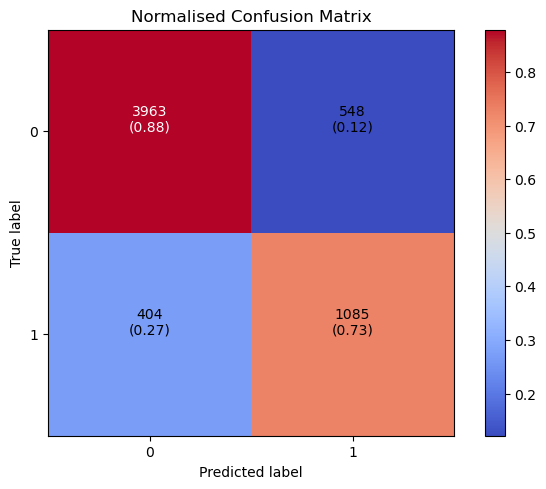

Precision: 0.8472
Recall: 0.8413
F1-Score: 0.8437
ROC and AUC Scores: 0.8036


In [ ]:
cm1 = confusion_matrix(y_test, y_pred_best)

# calculate precision, recall, and F1-score
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred_best, average='weighted')

# normalising the confusion matrix
cm_normalised1 = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis]

plt.imshow(cm_normalised1, interpolation='nearest', cmap=plt.cm.coolwarm)
plt.title('Normalised Confusion Matrix')
plt.colorbar()

# adding labels
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test), rotation=0)
plt.yticks(tick_marks, np.unique(y_test))

# adding text annotations
thresh1 = cm1.max() / 2.
for i, j in itertools.product(range(cm1.shape[0]), range(cm1.shape[1])):
    plt.text(j, i, f"{cm1[i, j]}\n({cm_normalised1[i, j]:.2f})",
        horizontalalignment="center",
        color="white" if cm1[i, j] > thresh1 else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# print precision, recall, and F1-score
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {fscore:.4f}")
print('ROC and AUC Scores: {0:0.4f}'.format(roc_auc_score(y_test, y_pred_best)))

### Re-visualise the ROC curve and AUC


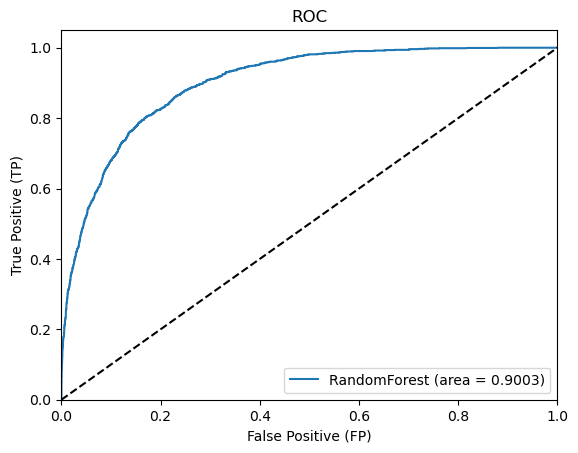

In [ ]:
# ROC curve and AUC
y_pred_proba = randomT.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.4f)' % roc_auc_score(y_test, y_pred_proba))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive (FP)')
plt.ylabel('True Positive (TP)')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from IPython.display import HTML, display
display(HTML("<table><tr><td><img src='roc-before.png'></td><td><img src='roc-after.png'></td></tr></table>"))

,


Before Handling Imbalance (Left Image with AUC = 0.8894):

- The ROC curve is relatively close to the top-left corner, indicating good performance.
- The Area Under the Curve (AUC) of 0.8894 is a strong performance, as it is close to 1.

After Handling Imbalance (Right Image with AUC = 0.9003):

- The ROC curve is slightly closer to the top-left corner after handling the imbalance, which is an improvement.
- The AUC has increased slightly to 0.9003, indicating that the model's ability to differentiate between the two classes has improved after handling the class imbalance.

<br><hr>

## K-fold cross-validation

The AUC scores for each fold are very close to one another, assuming that our model is stable and not heavily dependent on the particularities of any single fold.

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# the stratified k-fold cross-validation
sKfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# perform cross-validation
scores = cross_val_score(pipeline, X_train, y_train, cv=sKfold, scoring='roc_auc')

# print the AUC scores for each fold
print("AUC scores for each fold are: ", ['{0:0.4f}'.format(score) for score in scores])
print("Mean AUC score: {0:0.4f}".format(np.mean(scores)))

/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'

AUC scores for each fold are:  ['0.9108', '0.9130', '0.9093', '0.9022', '0.9027']
Mean AUC score: 0.9076


## Final training

In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline

params = {k.replace('classifier__', ''): v for k, v in best_params.items()}

# final training with full data
rfc_final = RandomForestClassifier(**params, random_state=42)

# add scaler and smote into pipeline
pipeline = ImbPipeline([
                    ('scaling', StandardScaler()),
                    ('smote', SMOTE(random_state=42)),
                    ('rfc_final', rfc_final)
])

# fit the model with full trainign data
pipeline.fit(X_train, y_train)

/Users/suwannakat/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Pipeline(steps=[('scaling', StandardScaler()),
                ('smote', SMOTE(random_state=42)),
                ('rfc_final',
                 RandomForestClassifier(max_depth=40, max_features='auto',
                                        min_samples_split=10, n_estimators=500,
                                        random_state=42))])

In [ ]:
# use our model to predict on test set
y_pred_final = pipeline.predict(X_test)
# suppoets the predict
y_pred_prob_final = pipeline.predict_proba(X_test)[:, 1]

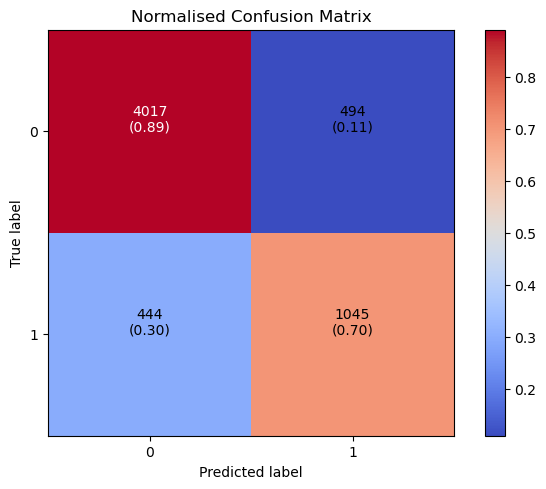

Accuracy Score: 0.8437
Precision Score: 0.6790
Recall Score: 0.7018
F1 Score: 0.6902
ROC and AUC Scores: 0.9024


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

cm2 = confusion_matrix(y_test, y_pred_final)

# calculate precision, recall, and F1-score
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred_final, average='weighted')

# normalising the confusion matrix
cm_normalised2 = cm2.astype('float') / cm2.sum(axis=1)[:, np.newaxis]

plt.imshow(cm_normalised2, interpolation='nearest', cmap=plt.cm.coolwarm)
plt.title('Normalised Confusion Matrix')
plt.colorbar()

# adding labels
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test), rotation=0)
plt.yticks(tick_marks, np.unique(y_test))

# adding text annotations
thresh2 = cm2.max() / 2.
for i, j in itertools.product(range(cm2.shape[0]), range(cm2.shape[1])):
    plt.text(j, i, f"{cm2[i, j]}\n({cm_normalised2[i, j]:.2f})",
        horizontalalignment="center",
        color="white" if cm1[i, j] > thresh2 else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print('Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_final)))
print('Precision Score: {0:0.4f}'.format(precision_score(y_test, y_pred_final)))
print('Recall Score: {0:0.4f}'.format(recall_score(y_test, y_pred_final)))
print('F1 Score: {0:0.4f}'.format(f1_score(y_test, y_pred_final)))
print('ROC and AUC Scores: {0:0.4f}'.format(roc_auc_score(y_test, y_pred_prob_final)))

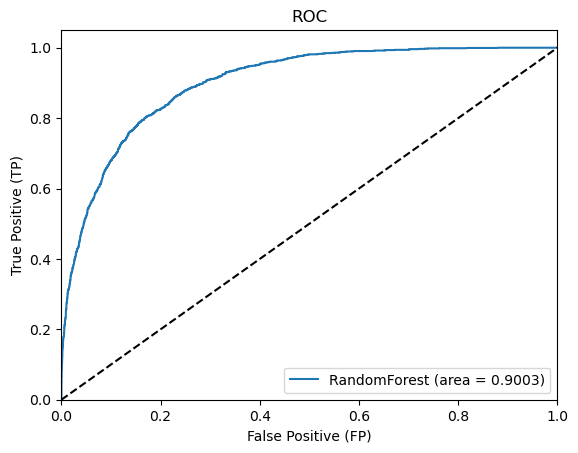

In [ ]:
y_pred_prob_final = randomT.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_final)
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.4f)' % roc_auc_score(y_test, y_pred_prob_final))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive (FP)')
plt.ylabel('True Positive (TP)')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()